In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/pruebaSBS/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/pruebaSBS/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malignf,list_bigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.000000,0.000000,"[tax bill, originally sold, little known, know...","[Baikalfinansgroup, Rosneft]",1.0,0.500000,0.000000,1.0,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,3,1,...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.600000,0.000000,"[tax bill, originally sold, little known, know...","[Yuganskneftegaz cost, Yuganskneftegaz cost 27...",0.0,0.600000,0.000000,1.0,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,7,1,...,Empty DataFrame Columns: [] Index: [loraine{lo...,0.555556,0.000000,"[Loraine, Loraine, London, United Kingdom]",[London],1.0,1.000000,0.000000,1.0,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.500000,0.000000,"[town girl, followed earlier, earlier films, f...","[Sennett, Extra Girl was produced Sennett ]",0.0,1.000000,0.000000,0.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,4,0,...,"die{die,VERB} die_...",0.250000,0.080000,"[bus collision, Uganda]","[bus collision, Uganda]",1.0,0.333333,0.333333,0.5,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,6,0,...,"wants{want,...",0.285714,0.038462,"[grading papers, understand answers, answers w...","[Haque, Haque wants to include English in some...",0.5,0.833333,0.166667,1.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,6,0,...,...,0.538462,0.026316,"[South African, African iron, steel manufactur...","[South African, African steel, steel manufactu...",0.6,1.000000,0.000000,1.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,0,...,has_been...,0.375000,0.031250,"[Critics said, main qualification, high school...","[NCEA, NCEA has been degraded authority ]",0.0,1.000000,0.000000,0.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,...,"Empty DataFrame Columns: [] Index: [two{two,NU...",0.375000,0.000000,"[pleaded guilty, aggravated assault, obstruct ...",[Tyler Jackson],1.0,1.000000,0.000000,1.0,NO


<Axes: title={'center': 'list_comp'}, xlabel='clases'>

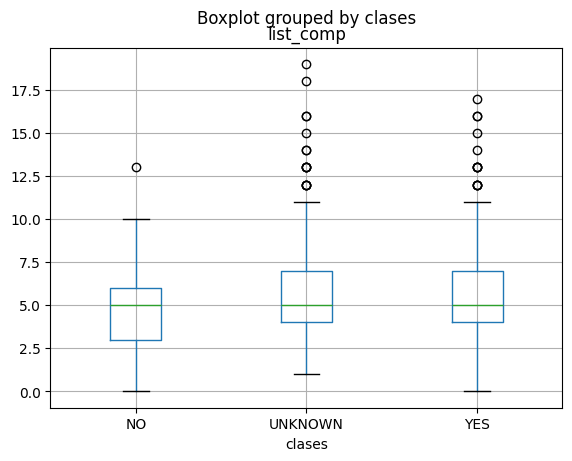

In [4]:
train.boxplot(by="clases",column="list_comp")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,5,0,43,0.000000,0.000000,1.0,0.500000,0.000000,1.0,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,3,1,...,6,0,42,0.600000,0.000000,0.0,0.600000,0.000000,1.0,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,7,1,...,10,0,47,0.555556,0.000000,1.0,1.000000,0.000000,1.0,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,7,0,66,0.500000,0.000000,0.0,1.000000,0.000000,0.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,4,0,...,9,2,25,0.250000,0.080000,1.0,0.333333,0.333333,0.5,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,6,0,...,8,1,26,0.285714,0.038462,0.5,0.833333,0.166667,1.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,6,0,...,14,1,38,0.538462,0.026316,0.6,1.000000,0.000000,1.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,0,...,9,1,32,0.375000,0.031250,0.0,1.000000,0.000000,0.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,...,9,0,33,0.375000,0.000000,1.0,1.000000,0.000000,1.0,NO


In [6]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'similitud_faltantes', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'diferencias', 'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'nomatch',
       'entidades', 'clases'],
      dtype='object')

In [7]:
train=train.drop(["list_rel_con"],axis=1)

In [8]:
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,5,0,43,0.000000,0.000000,1.0,0.500000,0.000000,1.0,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,3,1,6,0,42,0.600000,0.000000,0.0,0.600000,0.000000,1.0,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,7,1,10,0,47,0.555556,0.000000,1.0,1.000000,0.000000,1.0,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,7,0,66,0.500000,0.000000,0.0,1.000000,0.000000,0.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,4,0,9,2,25,0.250000,0.080000,1.0,0.333333,0.333333,0.5,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,6,0,8,1,26,0.285714,0.038462,0.5,0.833333,0.166667,1.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,6,0,14,1,38,0.538462,0.026316,0.6,1.000000,0.000000,1.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,0,9,1,32,0.375000,0.031250,0.0,1.000000,0.000000,0.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,9,0,33,0.375000,0.000000,1.0,1.000000,0.000000,1.0,NO


In [9]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [10]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [11]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades
sumas,1.000000,0.374017,0.170781,0.783954,0.755992,0.272153,0.795897,-0.351366,-0.063774,0.035649,0.062411,0.399983,0.251558,-0.236645,0.208886,-0.267809,-0.213978,0.210212,-0.208266
distancias,0.374017,1.000000,0.119683,0.557376,0.456623,0.258701,0.393848,-0.338954,0.142519,0.218198,0.442033,0.973854,-0.028916,-0.372572,0.854265,-0.352411,-0.339759,0.447503,-0.327466
entropia_total,0.170781,0.119683,1.000000,0.152250,0.123727,0.063776,0.147233,0.029637,0.078959,0.109137,0.227734,0.126372,-0.015772,-0.015520,0.124948,-0.124602,-0.040504,0.007419,-0.097650
entropias,0.783954,0.557376,0.152250,1.000000,0.969316,0.402215,0.928670,-0.628921,-0.080188,0.049934,0.079334,0.586587,-0.082947,-0.357596,0.516563,-0.333784,-0.300309,0.386747,-0.283852
mutinf,0.755992,0.456623,0.123727,0.969316,1.000000,0.391657,0.928985,-0.676870,-0.099198,0.010821,0.023624,0.478350,-0.083728,-0.315737,0.427237,-0.289739,-0.266365,0.323449,-0.246326
mearts,0.272153,0.258701,0.063776,0.402215,0.391657,1.000000,0.346297,-0.394006,-0.078570,0.027704,0.004295,0.277817,-0.132885,-0.168499,0.297379,-0.160616,-0.111662,0.218396,-0.168173
max_info,0.795897,0.393848,0.147233,0.928670,0.928985,0.346297,1.000000,-0.547827,-0.107720,-0.014210,-0.004747,0.419894,-0.062470,-0.285165,0.367996,-0.260785,-0.219495,0.282064,-0.230212
similitud_faltantes,-0.351366,-0.338954,0.029637,-0.628921,-0.676870,-0.394006,-0.547827,1.000000,0.072904,0.003275,-0.016552,-0.345597,0.001020,0.263919,-0.283785,0.189383,0.165244,-0.218017,0.181978
list_comp,-0.063774,0.142519,0.078959,-0.080188,-0.099198,-0.078570,-0.107720,0.072904,1.000000,0.105694,0.765020,0.140698,0.075295,0.058340,0.070925,0.101470,0.018559,-0.070963,0.009510
list_incomp,0.035649,0.218198,0.109137,0.049934,0.010821,0.027704,-0.014210,0.003275,0.105694,1.000000,0.182605,0.233409,-0.015632,-0.286250,0.221148,-0.222360,-0.267290,0.278396,-0.198442


<Axes: >

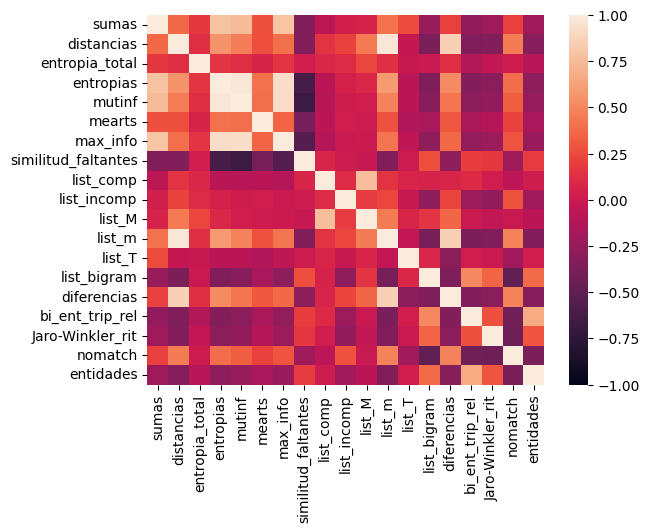

In [12]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [13]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades
sumas,1.000000,0.374017,0.170781,0.783954,0.755992,0.272153,0.795897,-0.351366,-0.063774,0.035649,0.062411,0.399983,0.251558,-0.236645,0.208886,-0.267809,-0.213978,0.210212,-0.208266
distancias,0.374017,1.000000,0.119683,0.557376,0.456623,0.258701,0.393848,-0.338954,0.142519,0.218198,0.442033,0.973854,-0.028916,-0.372572,0.854265,-0.352411,-0.339759,0.447503,-0.327466
entropia_total,0.170781,0.119683,1.000000,0.152250,0.123727,0.063776,0.147233,0.029637,0.078959,0.109137,0.227734,0.126372,-0.015772,-0.015520,0.124948,-0.124602,-0.040504,0.007419,-0.097650
entropias,0.783954,0.557376,0.152250,1.000000,0.969316,0.402215,0.928670,-0.628921,-0.080188,0.049934,0.079334,0.586587,-0.082947,-0.357596,0.516563,-0.333784,-0.300309,0.386747,-0.283852
mutinf,0.755992,0.456623,0.123727,0.969316,1.000000,0.391657,0.928985,-0.676870,-0.099198,0.010821,0.023624,0.478350,-0.083728,-0.315737,0.427237,-0.289739,-0.266365,0.323449,-0.246326
mearts,0.272153,0.258701,0.063776,0.402215,0.391657,1.000000,0.346297,-0.394006,-0.078570,0.027704,0.004295,0.277817,-0.132885,-0.168499,0.297379,-0.160616,-0.111662,0.218396,-0.168173
max_info,0.795897,0.393848,0.147233,0.928670,0.928985,0.346297,1.000000,-0.547827,-0.107720,-0.014210,-0.004747,0.419894,-0.062470,-0.285165,0.367996,-0.260785,-0.219495,0.282064,-0.230212
similitud_faltantes,-0.351366,-0.338954,0.029637,-0.628921,-0.676870,-0.394006,-0.547827,1.000000,0.072904,0.003275,-0.016552,-0.345597,0.001020,0.263919,-0.283785,0.189383,0.165244,-0.218017,0.181978
list_comp,-0.063774,0.142519,0.078959,-0.080188,-0.099198,-0.078570,-0.107720,0.072904,1.000000,0.105694,0.765020,0.140698,0.075295,0.058340,0.070925,0.101470,0.018559,-0.070963,0.009510
list_incomp,0.035649,0.218198,0.109137,0.049934,0.010821,0.027704,-0.014210,0.003275,0.105694,1.000000,0.182605,0.233409,-0.015632,-0.286250,0.221148,-0.222360,-0.267290,0.278396,-0.198442


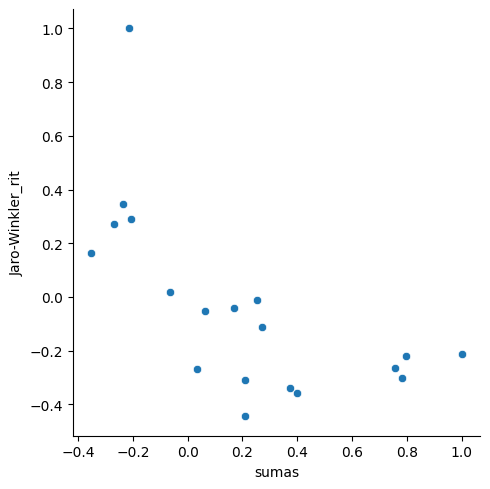

In [14]:
# Checar variables colineales
sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [15]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [16]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

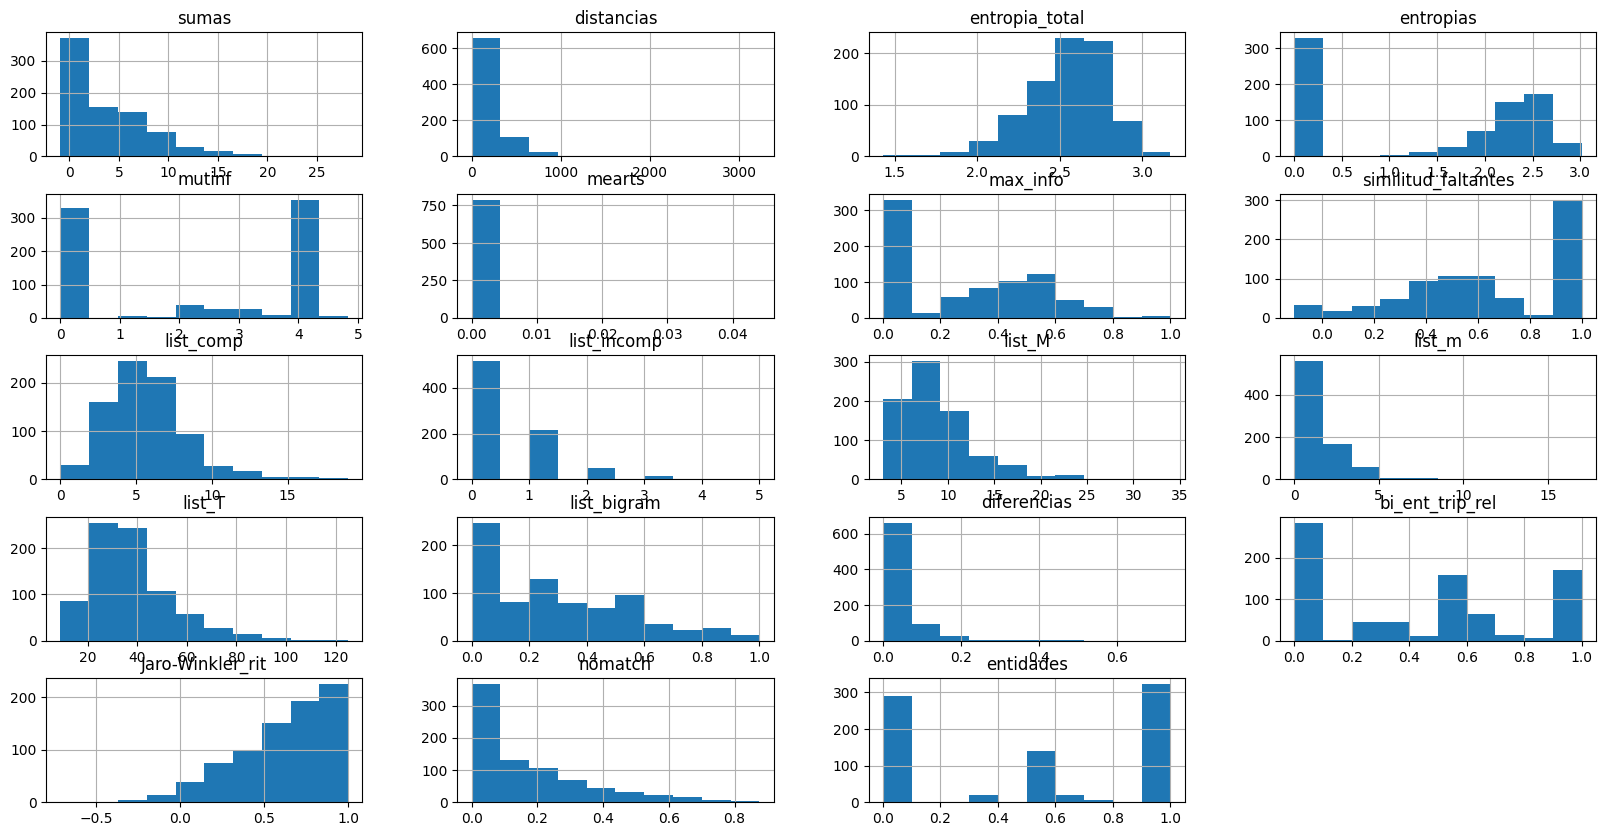

In [17]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [18]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/pruebaSBS/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/pruebaSBS/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [19]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malignf,list_bigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.375,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,...,Empty DataFrame Columns: [] Index: [claude{cla...,0.166667,0.000000,"[French movie, movie director, chilling tales,...","[Beau Serge, Chabrol, Beau Serge was directed ...",0.333333,1.000000,0.000000,0.5,YES
1,0.000000,129.894150,2.224,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,1,...,"made_by{made_by,NO...",0.333333,0.027027,"[French movie, movie director, chilling tales,...","[French movie, movie director, Le Boucher, Le ...",0.750000,1.000000,0.000000,1.0,YES
2,0.000000,0.000000,0.722,0.000,0.000000e+00,0.000000,0.000000,1.000000,2,1,...,Empty DataFrame Columns: [] Index: [claude{cla...,0.333333,0.000000,"[Claude Chabrol, Agnes, Stéphane Audran, Auror...","[Aurore Paquiss, Chabrol, Aurore Paquiss marri...",0.333333,0.500000,0.000000,0.5,YES
3,0.000000,0.000000,2.542,0.000,0.000000e+00,0.000000,0.000000,1.000000,8,0,...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.500000,0.000000,"[small Maoist, Maoist political, political par...","[Maoist political, political party, Michael La...",1.000000,0.714286,0.000000,1.0,YES
4,6.383789,138.847382,2.453,2.475,3.915644e+00,0.004324,0.412710,0.347696,6,0,...,oppone...,0.333333,0.026316,"[small Maoist, Maoist political, political par...","[Michael Laski, China]",1.000000,0.500000,0.000000,1.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.488,0.000,0.000000e+00,0.000000,0.000000,1.000000,2,0,...,"Empty DataFrame Columns: [] Index: [it{it,PRON...",0.200000,0.000000,"[risk destabilising, led Chinese, Chinese econ...","[led economy, China, China has economy ]",0.000000,0.600000,0.000000,0.0,YES
796,0.000000,0.000000,2.969,0.000,0.000000e+00,0.000000,0.000000,1.000000,2,0,...,"Empty DataFrame Columns: [] Index: [last{last,...",0.400000,0.000000,"[saw exports, services rise, imports gained, U...","[exports rose, US]",0.500000,0.666667,0.000000,1.0,NO
797,9.458171,200.796814,2.599,2.499,3.976425e+00,0.002651,0.467463,0.482878,7,0,...,"there{there,PRON} ...",0.375000,0.023256,"[largest consumer, imports rose, crude hitting...","[Israel, Lebanon]",1.000000,0.750000,0.250000,1.0,UNKNOWN
798,3.272335,165.737167,2.443,1.969,3.985115e+00,0.003217,0.353093,0.263597,6,0,...,"seen{see,...",0.250000,0.037037,"[Olympic site, alien presence, Forbidden City]",[Forbidden City],1.000000,0.400000,0.200000,1.0,UNKNOWN


In [20]:
test=test.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)


In [21]:
test=test.drop(["list_rel_con"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.375,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,7,0,37,0.166667,0.000000,0.333333,1.000000,0.000000,0.5,YES
1,0.000000,129.894150,2.224,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,1,10,1,37,0.333333,0.027027,0.750000,1.000000,0.000000,1.0,YES
2,0.000000,0.000000,0.722,0.000,0.000000e+00,0.000000,0.000000,1.000000,2,1,4,0,19,0.333333,0.000000,0.333333,0.500000,0.000000,0.5,YES
3,0.000000,0.000000,2.542,0.000,0.000000e+00,0.000000,0.000000,1.000000,8,0,11,0,38,0.500000,0.000000,1.000000,0.714286,0.000000,1.0,YES
4,6.383789,138.847382,2.453,2.475,3.915644e+00,0.004324,0.412710,0.347696,6,0,7,1,38,0.333333,0.026316,1.000000,0.500000,0.000000,1.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.488,0.000,0.000000e+00,0.000000,0.000000,1.000000,2,0,6,0,37,0.200000,0.000000,0.000000,0.600000,0.000000,0.0,YES
796,0.000000,0.000000,2.969,0.000,0.000000e+00,0.000000,0.000000,1.000000,2,0,6,0,37,0.400000,0.000000,0.500000,0.666667,0.000000,1.0,NO
797,9.458171,200.796814,2.599,2.499,3.976425e+00,0.002651,0.467463,0.482878,7,0,9,1,43,0.375000,0.023256,1.000000,0.750000,0.250000,1.0,UNKNOWN
798,3.272335,165.737167,2.443,1.969,3.985115e+00,0.003217,0.353093,0.263597,6,0,9,1,27,0.250000,0.037037,1.000000,0.400000,0.200000,1.0,UNKNOWN


In [22]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.375,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,7,0,37,0.166667,0.000000,0.333333,1.000000,0.000000,0.5,YES
1,0.000000,129.894150,2.224,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,1,10,1,37,0.333333,0.027027,0.750000,1.000000,0.000000,1.0,YES
2,0.000000,0.000000,0.722,0.000,0.000000e+00,0.000000,0.000000,1.000000,2,1,4,0,19,0.333333,0.000000,0.333333,0.500000,0.000000,0.5,YES
3,0.000000,0.000000,2.542,0.000,0.000000e+00,0.000000,0.000000,1.000000,8,0,11,0,38,0.500000,0.000000,1.000000,0.714286,0.000000,1.0,YES
4,6.383789,138.847382,2.453,2.475,3.915644e+00,0.004324,0.412710,0.347696,6,0,7,1,38,0.333333,0.026316,1.000000,0.500000,0.000000,1.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.488,0.000,0.000000e+00,0.000000,0.000000,1.000000,2,0,6,0,37,0.200000,0.000000,0.000000,0.600000,0.000000,0.0,YES
796,0.000000,0.000000,2.969,0.000,0.000000e+00,0.000000,0.000000,1.000000,2,0,6,0,37,0.400000,0.000000,0.500000,0.666667,0.000000,1.0,NO
797,9.458171,200.796814,2.599,2.499,3.976425e+00,0.002651,0.467463,0.482878,7,0,9,1,43,0.375000,0.023256,1.000000,0.750000,0.250000,1.0,UNKNOWN
798,3.272335,165.737167,2.443,1.969,3.985115e+00,0.003217,0.353093,0.263597,6,0,9,1,27,0.250000,0.037037,1.000000,0.400000,0.200000,1.0,UNKNOWN


In [23]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [24]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [25]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [26]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.6533123 , ..., 0.5       , 0.        ,
        1.        ],
       [0.        , 0.        , 0.59211356, ..., 0.6       , 0.        ,
        1.        ],
       [0.        , 0.        , 0.85268139, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.04520946, 0.80252366, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.82555205, ..., 1.        , 0.        ,
        1.        ],
       [0.27580775, 0.03806496, 0.82239748, ..., 1.        , 0.        ,
        1.        ]])

In [27]:
X_train.shape

(800, 19)

In [28]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [29]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
model.decision_function(X_train)

array([ 1.15975992e+00,  4.90403656e-01,  1.40547826e+00,  6.56362113e-01,
       -2.17676515e-01,  4.36755717e-01,  6.07091117e-01,  6.89665473e-01,
        5.54895646e-01, -4.13391850e-01, -3.81837160e-01,  1.43289795e+00,
        1.08752601e+00,  1.05708527e-01,  2.24822435e-01,  9.71049283e-01,
        1.40138997e-01, -5.36211876e-01, -4.72687190e-02,  3.32021287e-01,
        1.19627201e+00, -1.23590942e+00,  6.57347930e-01,  3.40861766e-01,
        6.05483455e-01,  7.09910142e-01,  1.16645082e+00,  9.92969802e-01,
        4.12650626e-01,  3.00499836e-01,  1.48603870e-01,  6.86486968e-01,
       -2.51043506e-03,  8.68528362e-01, -2.07066757e-01, -8.84261399e-01,
        4.98746212e-01,  5.39645971e-01,  1.00793743e+00,  1.33288232e+00,
        8.34417688e-01,  1.05562749e+00,  1.20679723e+00,  8.14182485e-01,
       -1.62039639e+00,  1.08711113e-01,  2.38207444e-01,  1.24759464e+00,
        7.83505705e-01, -1.52842068e-01, -1.03287743e+00,  6.07661936e-02,
        8.29923370e-01,  

In [31]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'similitud_faltantes', 'list_comp', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'list_bigram', 'diferencias',
       'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'nomatch', 'entidades'],
      dtype='object')

In [32]:
model.classes_

array([0, 1])

In [33]:
model.coef_[0]

array([ 0.49603272, -0.90912632, -0.04585139, -0.16635156, -0.50702088,
        0.13080744,  0.61169046, -0.03755509, -0.32230483, -0.55122129,
        0.41706892, -1.19984324,  0.57960762,  0.21767779,  0.01137455,
        0.7601542 ,  0.43036195, -1.95959257,  0.38066069])

In [34]:
coeficientes=model.coef_[0]

In [35]:
coeficientes

array([ 0.49603272, -0.90912632, -0.04585139, -0.16635156, -0.50702088,
        0.13080744,  0.61169046, -0.03755509, -0.32230483, -0.55122129,
        0.41706892, -1.19984324,  0.57960762,  0.21767779,  0.01137455,
        0.7601542 ,  0.43036195, -1.95959257,  0.38066069])

In [36]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  15 bi_ent_trip_rel 17 nomatch


In [37]:
n_columns=train.shape[1]-1

In [38]:
n_columns

19

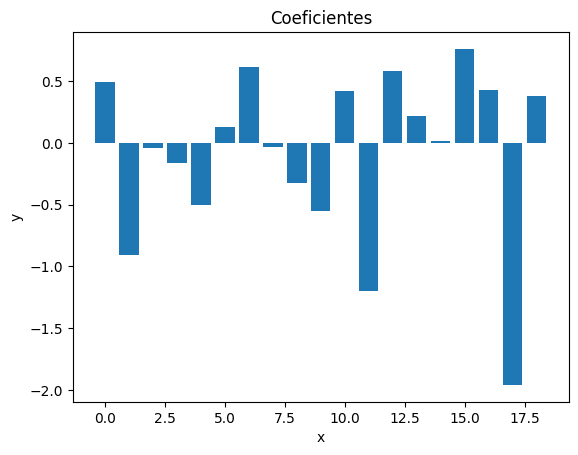

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [40]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.77462492, ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 0.06280514, 0.72537508, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.23548598, ..., 0.5       , 0.        ,
        0.5       ],
       ...,
       [0.4929136 , 0.09708729, 0.84768428, ..., 0.75      , 0.3125    ,
        1.        ],
       [0.17053811, 0.0801356 , 0.79680365, ..., 0.4       , 0.25      ,
        1.        ],
       [0.        , 0.12098143, 0.84116112, ..., 0.76923077, 0.09615385,
        1.        ]])

In [41]:
X_test.shape

(800, 19)

In [42]:
predictions = model.predict(X_test)

In [43]:
print(confusion_matrix(y_test, predictions))

[[212 178]
 [122 288]]


In [44]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.62
precision:  0.62
recall 0.7
f1_score:  0.66
matthews_score:  0.25


In [45]:
X_train.shape

(800, 19)

In [46]:
X_test.shape

(800, 19)

In [47]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [48]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [49]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.670000 (0.115263)
Logistic Regression Precision:: 0.680000 (0.120123)
Logistic Regression Recall:: 0.730000 (0.150497)
Logistic Regression F1-score:: 0.690000 (0.095579)


In [50]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.310000 (0.250399)


In [51]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [52]:
#linear_model

In [53]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.63      0.54      0.59       390
           1       0.62      0.70      0.66       410

    accuracy                           0.62       800
   macro avg       0.63      0.62      0.62       800
weighted avg       0.63      0.62      0.62       800



In [55]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [56]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'similitud_faltantes', 'list_comp', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'list_bigram', 'diferencias',
       'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'nomatch', 'entidades'],
      dtype='object')

In [57]:
explainer.expected_value

-0.07656064154518513

In [58]:
X_test

array([[0.        , 0.        , 0.77462492, ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 0.06280514, 0.72537508, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.23548598, ..., 0.5       , 0.        ,
        0.5       ],
       ...,
       [0.4929136 , 0.09708729, 0.84768428, ..., 0.75      , 0.3125    ,
        1.        ],
       [0.17053811, 0.0801356 , 0.79680365, ..., 0.4       , 0.25      ,
        1.        ],
       [0.        , 0.12098143, 0.84116112, ..., 0.76923077, 0.09615385,
        1.        ]])

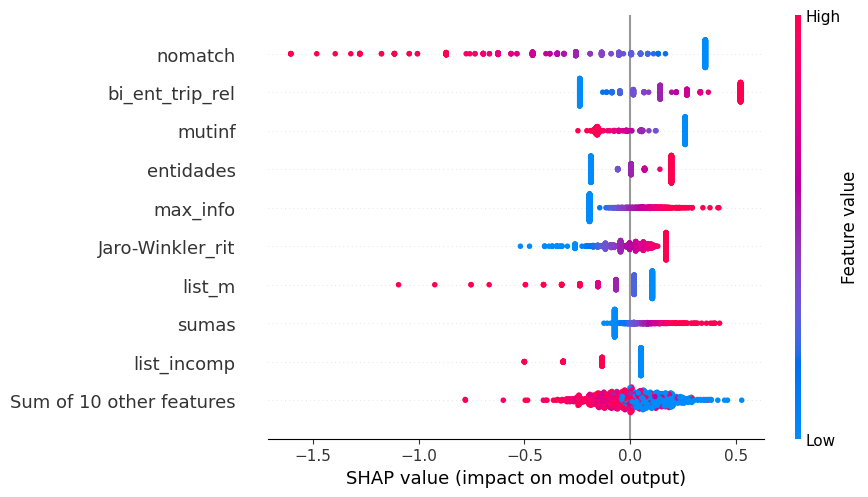

In [59]:
shap.plots.beeswarm(shap_values)

[0.18670504 0.07878892 0.54533594 0.76360656 0.82276753 0.04861899
 0.4109464  0.32388638 0.22222222 0.         0.20689655 0.07692308
 0.30275229 0.2        0.07459207 0.66666667 0.9        0.21818182
 1.        ] 0 1


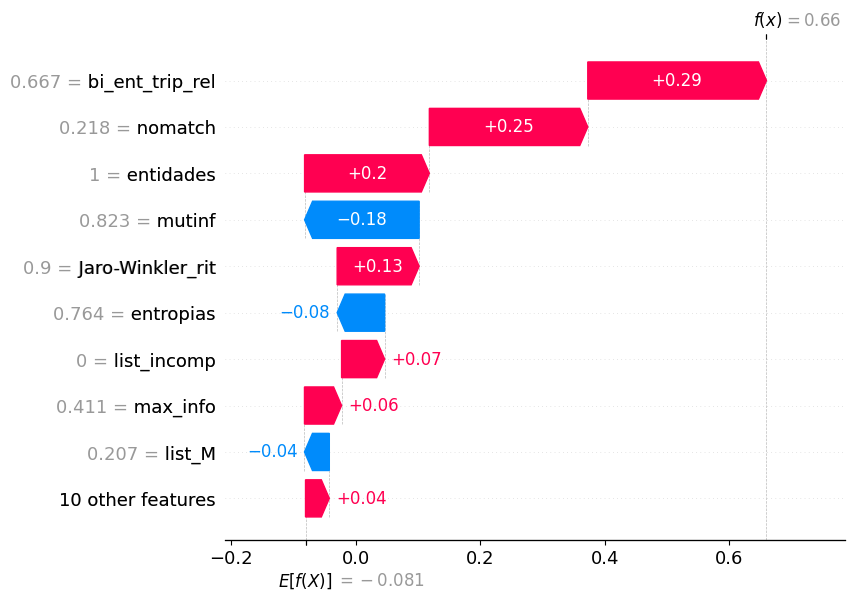

In [93]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [94]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.73026745 0.         0.         0.
 0.         1.         0.38888889 0.         0.24137931 0.
 0.30275229 0.33333333 0.         0.66666667 0.95       0.
 1.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

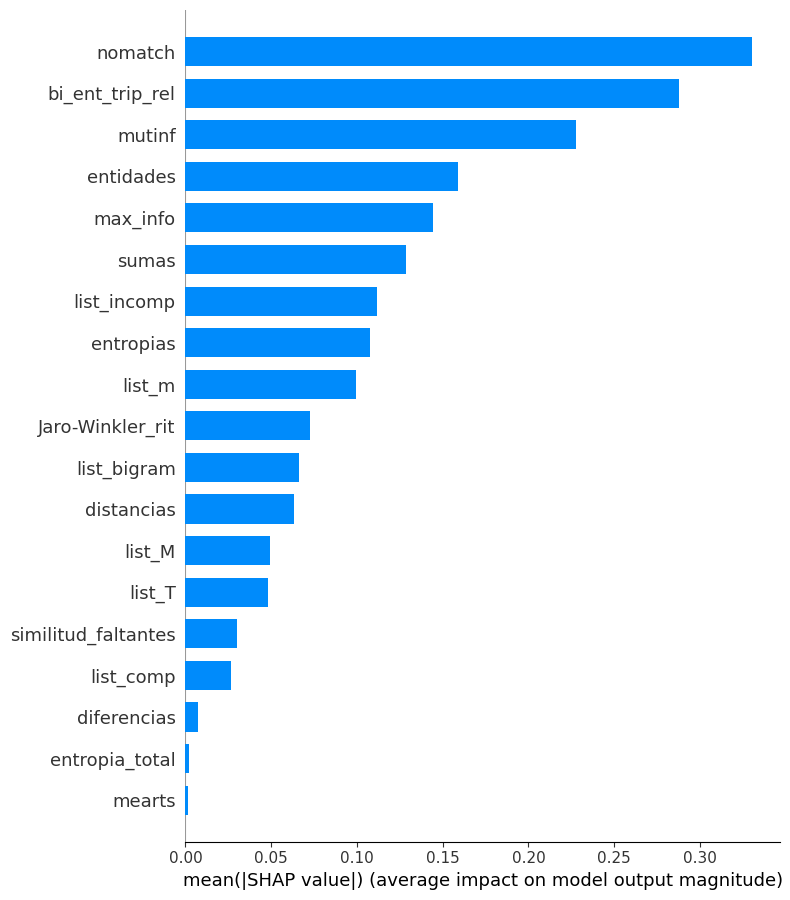

In [95]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

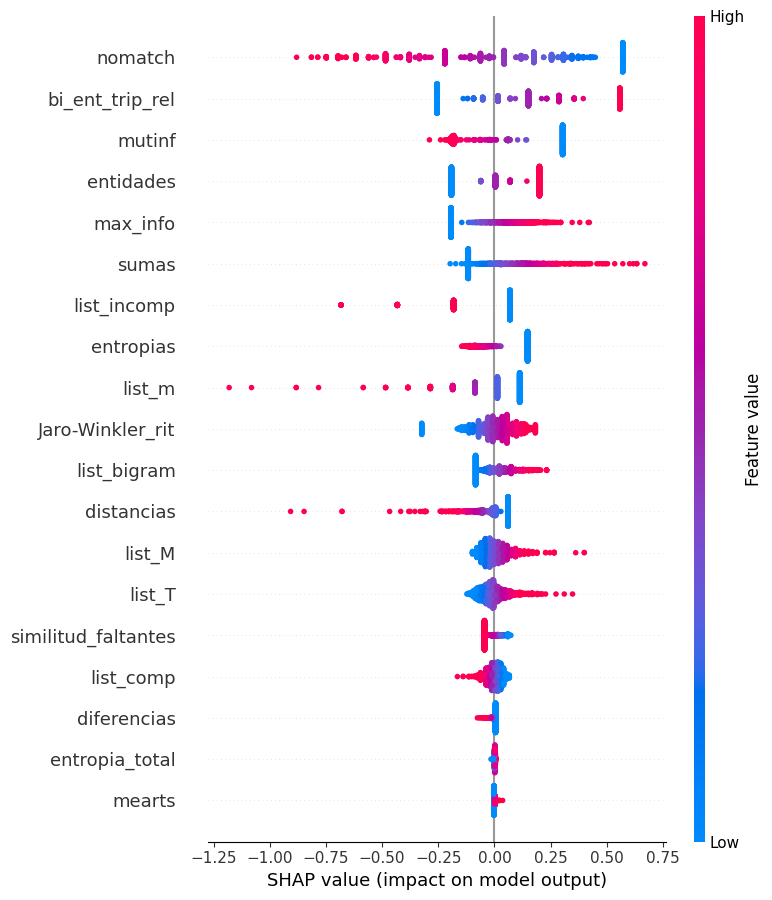

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

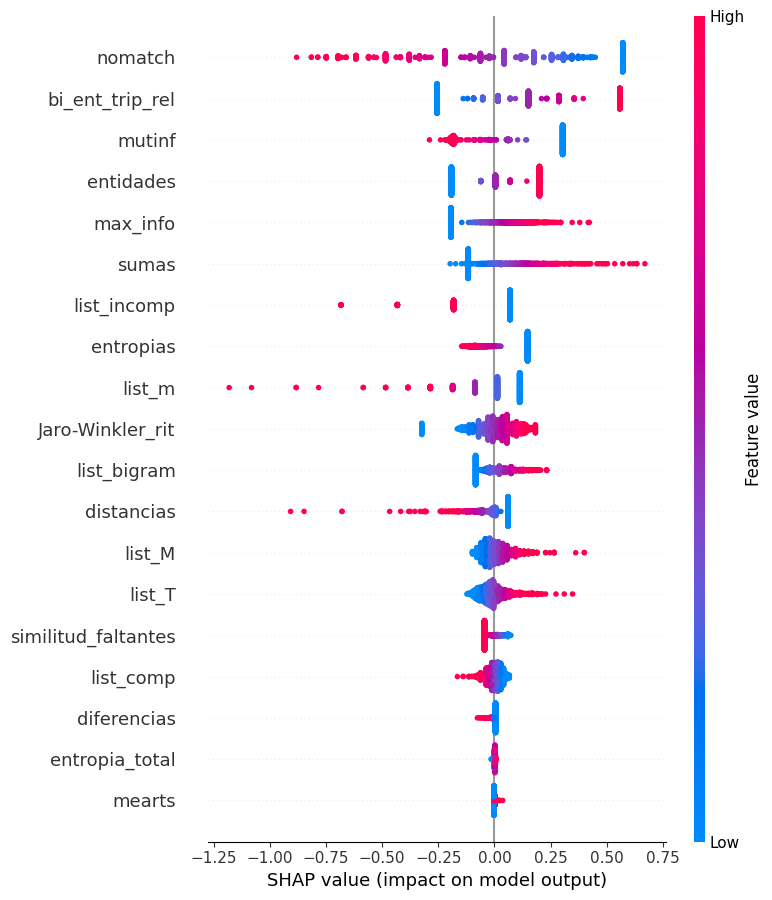

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

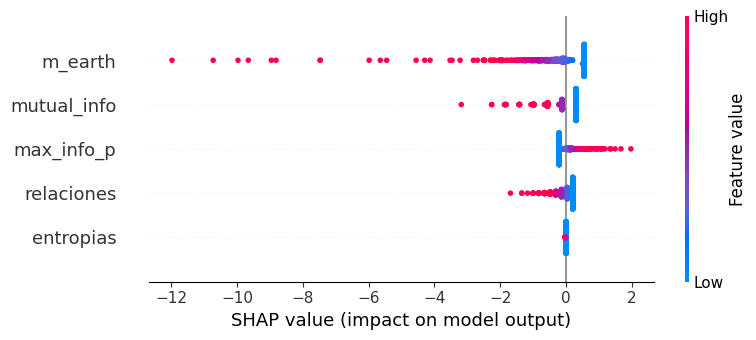

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


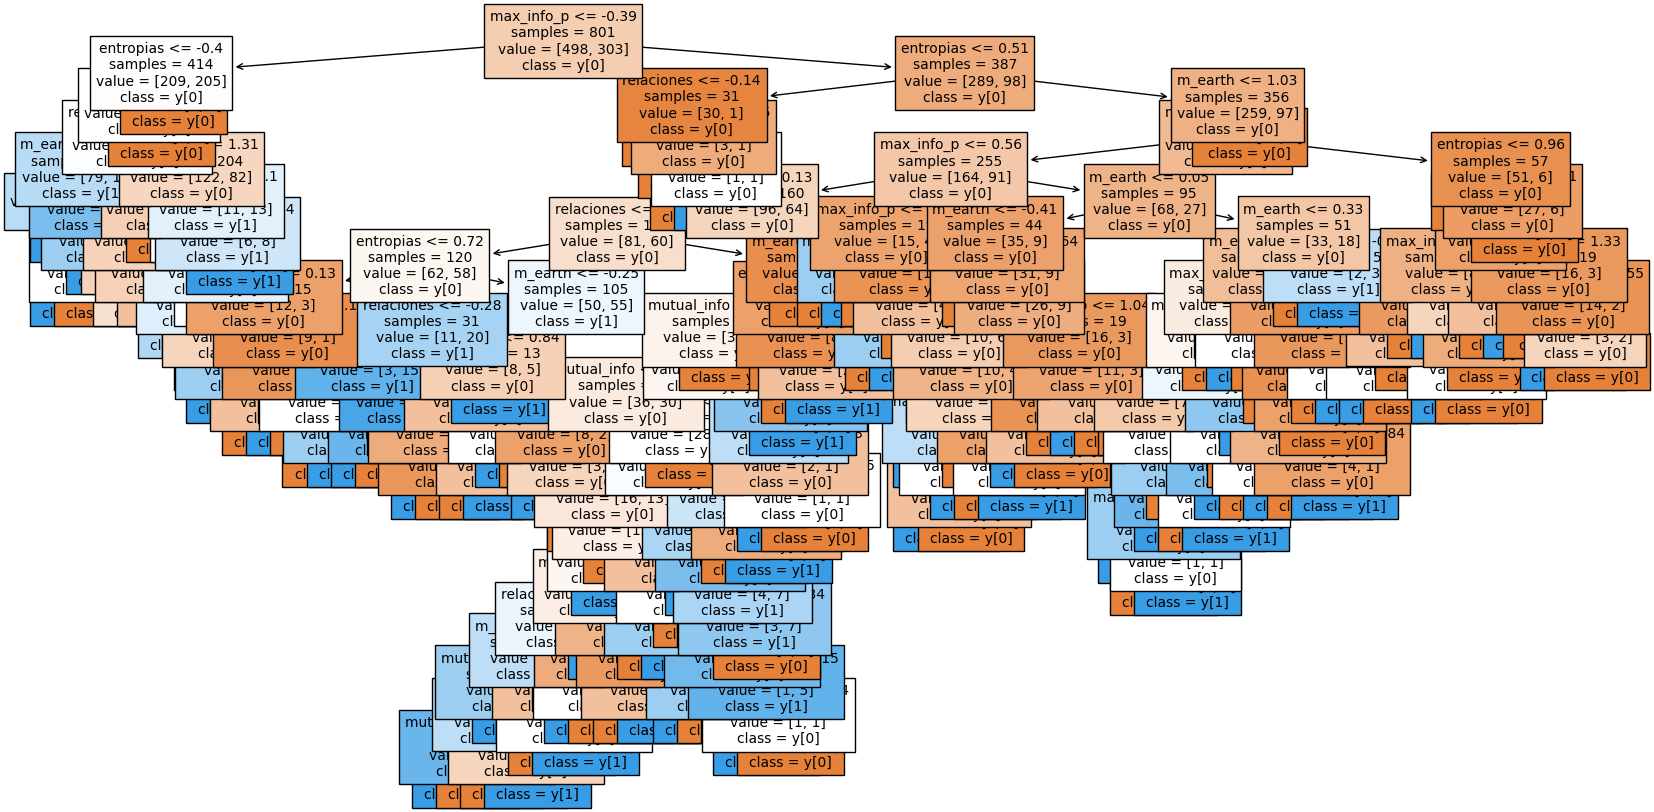

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )